<h1>Auto Encoder</h1>
<h6>Saket Tiwari</h6>
Date: 01 July 2019

In [33]:
#in autoencoding we first encode the image to compress the image and then decoding or expanding image
#since compression is dataset dependent therefore we will not use it to
#it is actually used to clrear the noise 
#it is unsupervised
#we use it for noise removal

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from keras.datasets import mnist

In [36]:
(x_train, _ ), (x_test, _) = mnist.load_data() #we dont require y_train or y_test because unsupervised learning, model will learn itself

In [37]:
x_train=x_train.astype('float32')/255 #Normalizing
x_test=x_test.astype('float32')/255 #Normalizing

In [38]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_test.shape,x_train.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [39]:
#adding random noise
noise_factor= 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size= x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size= x_test.shape)

x_train_noisy =np.clip(x_train_noisy,0.,1.) # value less than 0 becomes 0 and greatefr than 1 becomes 1
x_test_noisy =np.clip(x_test_noisy,0.,1.) # value less than 0 becomes 0 and greatefr than 1 becomes 1

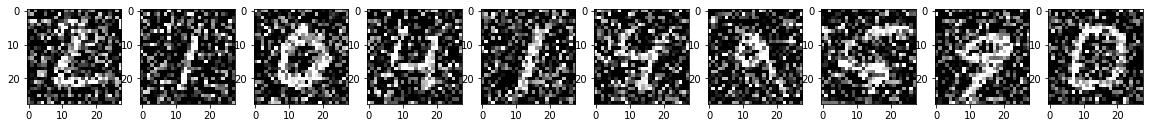

In [40]:
n=10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
    ax= plt.subplot(1,n,i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
plt.show()

In [41]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model


In [45]:
#Encoder

input_img= Input(shape=(28,28,1))
x=Conv2D(32, (3,3), activation='relu', padding = 'same')(input_img)
#here the dimension of the image remains same because we have used padding='same'
x=MaxPooling2D((2,2), padding='same')(x)
#here dimension becomes half

x=Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
#here the dimension of the image remains same because we have used padding='same'
encoded=MaxPooling2D((2,2), padding='same')(x)
# 'same' gives us the matrix one greater dimension if the dimension is odd so that no data is lost
# 'valid' removes one dimension therefore data is lost



#decoder
x=Conv2D(32, (3,3), activation='relu', padding = 'same')(encoded)
x=UpSampling2D((2,2))(x)

x=Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
x=UpSampling2D((2,2))(x)

decoded= Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [46]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [47]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True,validation_data=(x_test_noisy,x_test))

W0701 13:03:12.873377 11080 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1840 - val_loss: 0.1237
Epoch 2/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.1188 - val_loss: 0.1131
Epoch 3/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1120 - val_loss: 0.1070
Epoch 4/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.1081 - val_loss: 0.1046
Epoch 5/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1059 - val_loss: 0.1048
Epoch 6/10
60000/60000 [==============================] - 233s 4ms/step - loss: 0.1044 - val_loss: 0.1060
Epoch 7/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1029 - val_loss: 0.1026
Epoch 8/10
60000/60000 [==============================] - 231s 4ms/step - loss: 0.1023 - val_loss: 0.1002
Epoch 9/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1015 - val_loss: 0.1